In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

from python_functions import *

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
# Readomg the Nemo and Noaa file
Nemo83 = nemo()
Nemo83.read_nemo('83')
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [3]:
run36 = spinup()
run36.readSpin('/scratch/general/am8e13/results36km_newspinup/spinup36km.nc')
run18 = spinup()
run18.readSpin('/scratch/general/am8e13/results18km_newspinup/spinup18km.nc')

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [4]:
barents,fram,bering,davis,arctic1,arctic2,arctic3,arctic4 = arctic_reg()

In [117]:
class Woa:
    def __init__(self):
        self.lat = run36.lat
        self.lon = run36.lon
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/WOA05_THETA_JAN_210x192x50_arctic'
        self.T = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.T = np.squeeze(self.T,axis=0)
        self.T[run36.bathy == 0] = np.nan
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/WOA05_SALT_JAN_210x192x50_arctic'
        self.S = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.S = np.squeeze(self.S,axis=0)
        self.S[run36.bathy == 0] = np.nan
        self.depth = run36.depth
        self.title = 'Woa'
woa = Woa()

In [122]:
class Phc:
    def __init__(self):
        self.lat = run36.lat
        self.lon = run36.lon
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/theta.phc_210_192_50_12'
        self.T = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.T = np.squeeze(self.T,axis=0)
        self.T[run36.bathy == 0] = np.nan
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/salt.phc_210_192_50_12'
        self.S = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.S = np.squeeze(self.S,axis=0)
        self.S[run36.bathy == 0] = np.nan
        self.depth = run36.depth
        self.title = 'PHC'
phc = Phc()

In [7]:
comp_data = {'run36' : run36, 'run18' : run18 , 'Nemo25' : Nemo25 ,'woa' : woa,'Noaa' : Noaa , 'phc', phc} 

Davis Strait

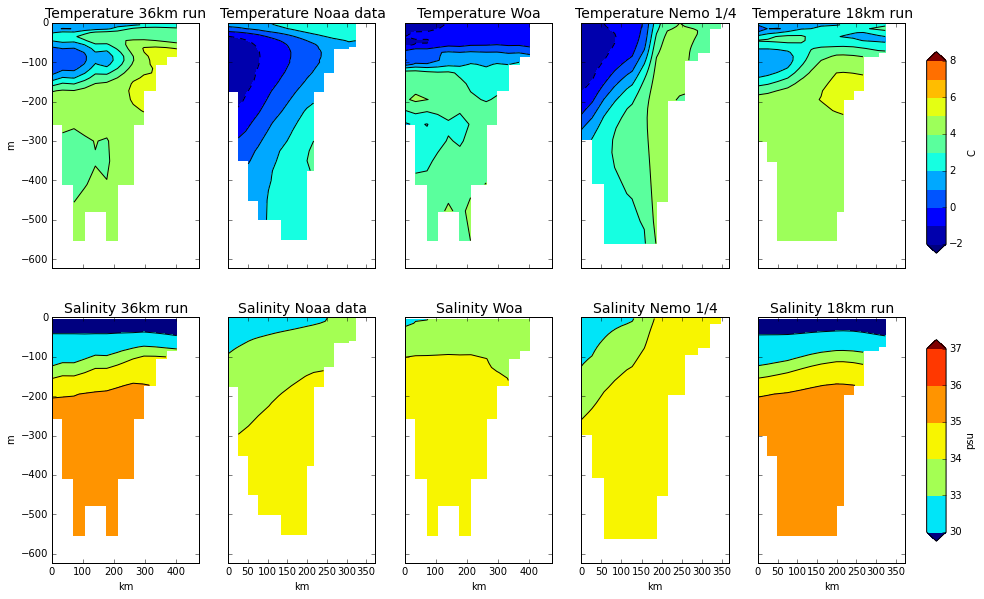

In [8]:
comp_plot(comp_data,davis)

Bering Strait 

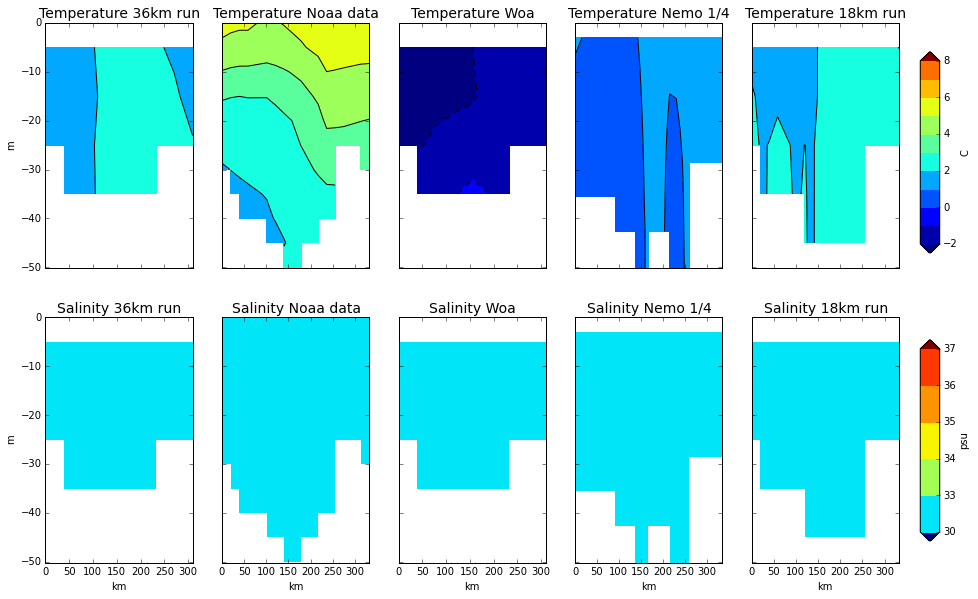

In [9]:
comp_plot(comp_data,bering)

Fram Strait

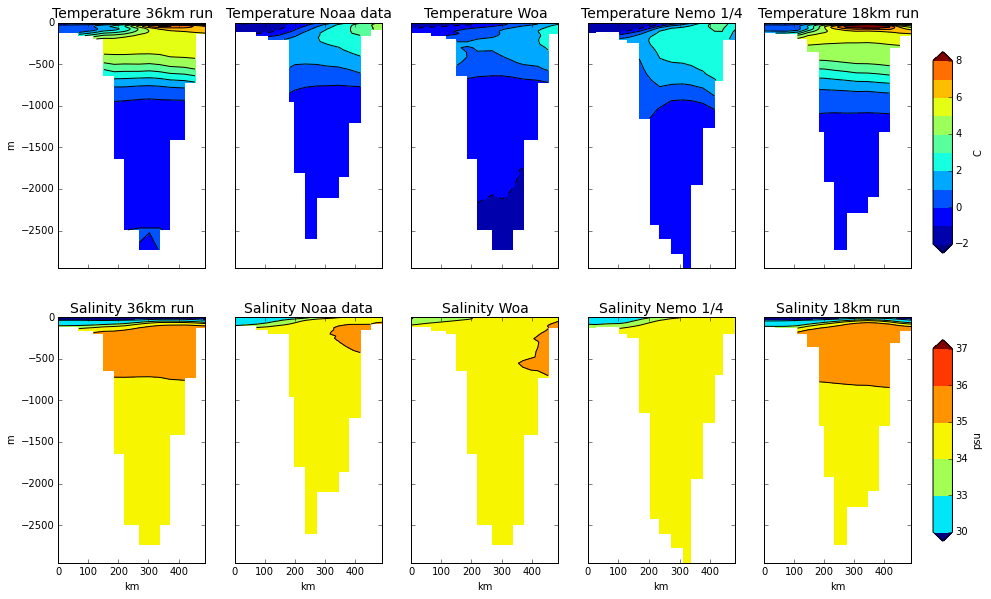

In [10]:
comp_plot(comp_data,fram)

Barents Strait

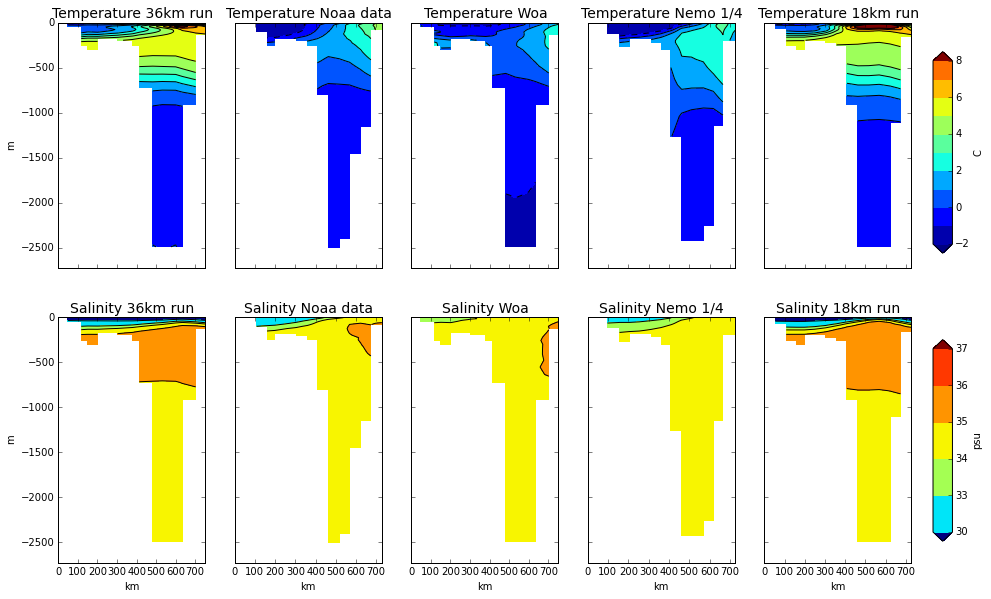

In [11]:
comp_plot(comp_data,barents)

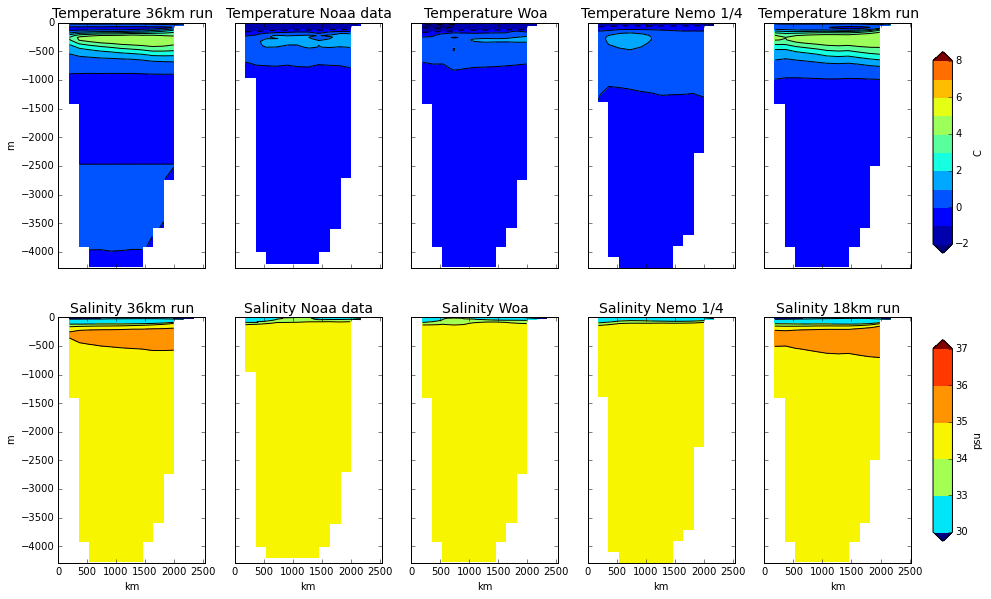

In [12]:
comp_plot(comp_data,arctic1)

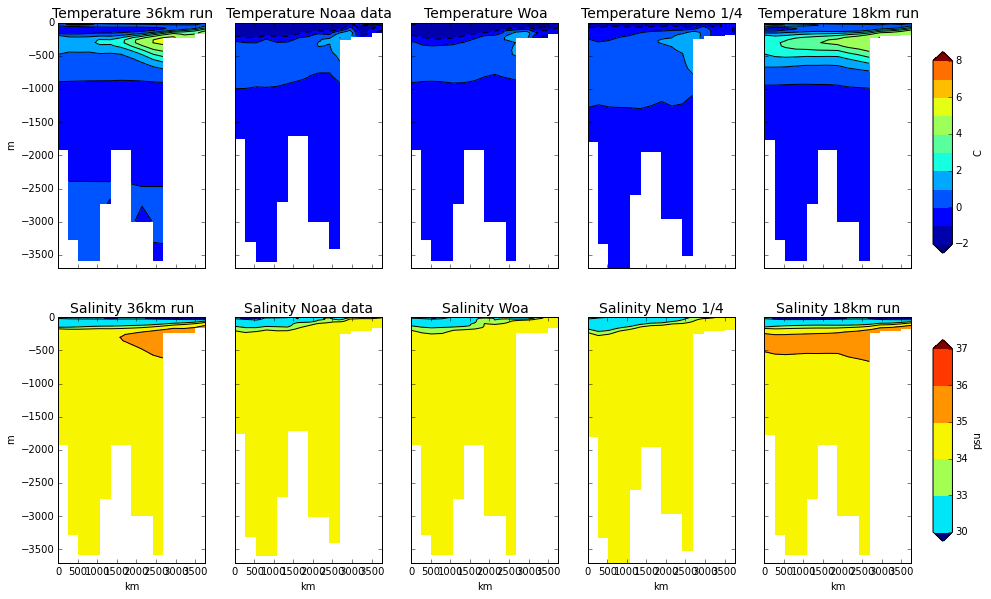

In [13]:
comp_plot(comp_data,arctic2)

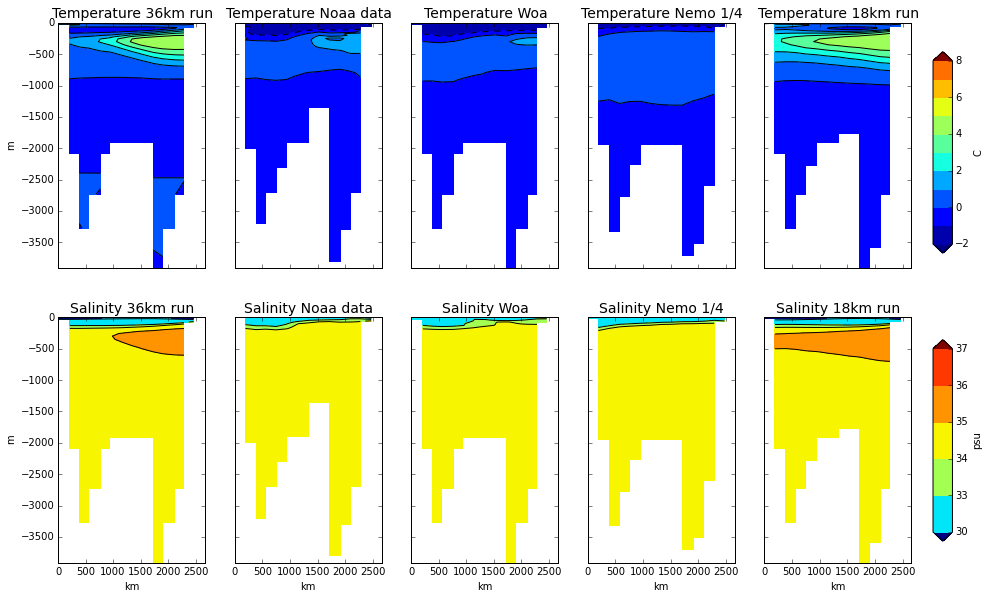

In [14]:
comp_plot(comp_data,arctic3)

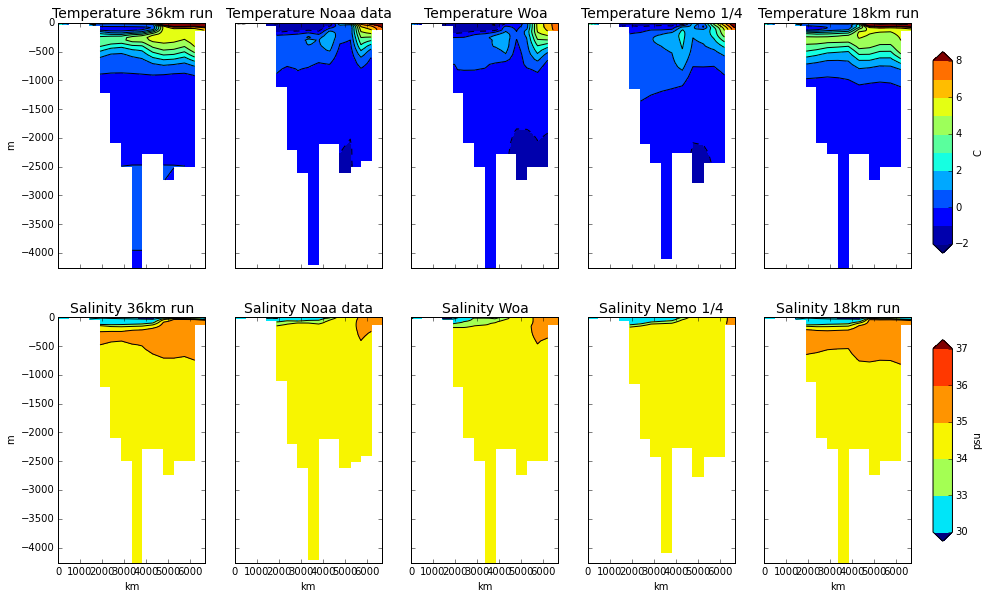

In [15]:
comp_plot(comp_data,arctic4)

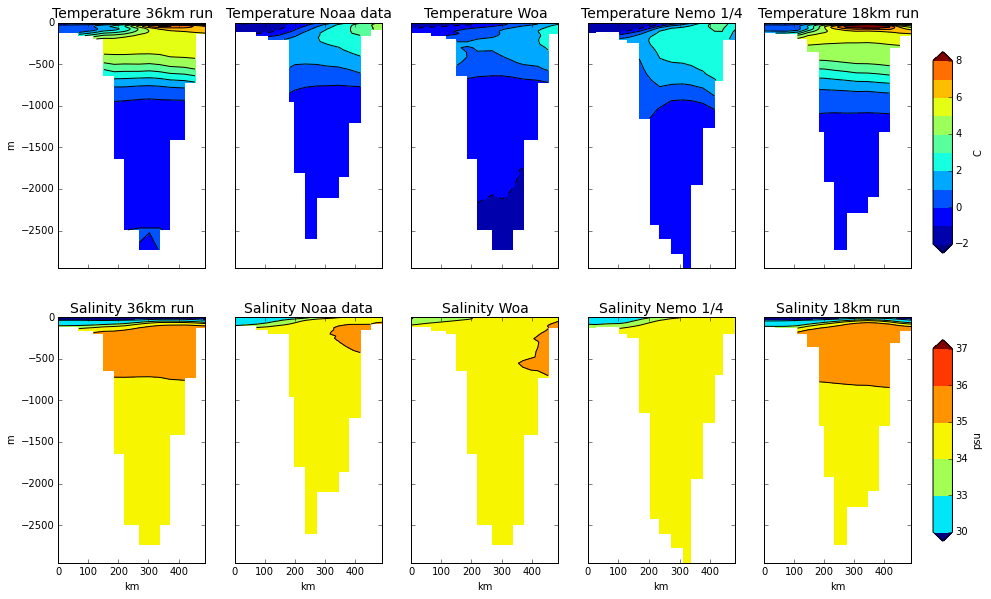

In [16]:
comp_plot(comp_data,fram)

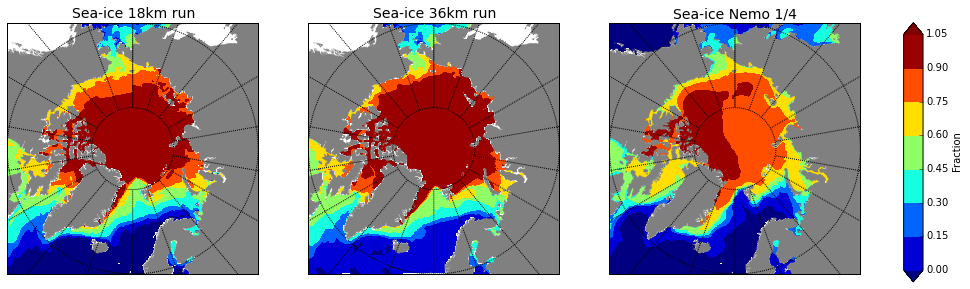

In [17]:
plot_seaice(run18,run36,Nemo25)

In [227]:
def plot_sst(data1,data2,data3,data4):
    vmin = -2
    vmax = 12
    tempbounds = range(vmin,vmax,2)

    cs = plt.contourf(data4.T[0,:,:],vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    plt.colorbar(cs)
    plt.close()

    fig, ((ax1, ax2) , (ax3 ,ax4)) = plt.subplots(2,2)
    ax1 = plt.subplot(2,2,1)
    im1 = bp(data1.lon, data1.lat, data1.T[2,:,:], yescbar = False,  vmin=vmin, vmax=vmax, level=tempbounds, extend='both')
    ax1.set_title('SST '+data1.title)
    ax1.title.set_fontsize('14')

    ax2 = plt.subplot(2,2,2)
    im2 = bp(data2.lon, data2.lat, data2.T[2,:,:] - phc.T[2,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax2.set_title('SST '+data2.title)
    ax2.title.set_fontsize('14')

    ax3 = plt.subplot(2,2,3)
    im3 = bp(data3.lon, data3.lat, data3.T[2,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax3.set_title('SST '+data3.title)
    ax3.title.set_fontsize('14')

    ax4 = plt.subplot(2,2,4)
    im4 = bp(data4.lon, data4.lat, data4.T[2,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax4.set_title('SST '+data4.title)
    ax4.title.set_fontsize('14')

    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(cs, cax=cbar_ax,)
    cbar.ax.set_ylabel('C')

    fig.subplots_adjust(right=1.7,top=2.)

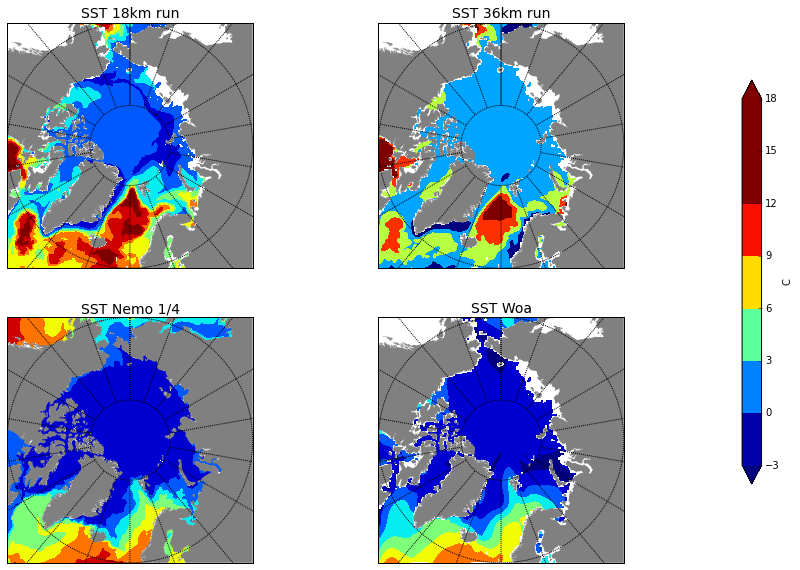

In [228]:
plot_sst(run18,run36,Nemo25,woa)

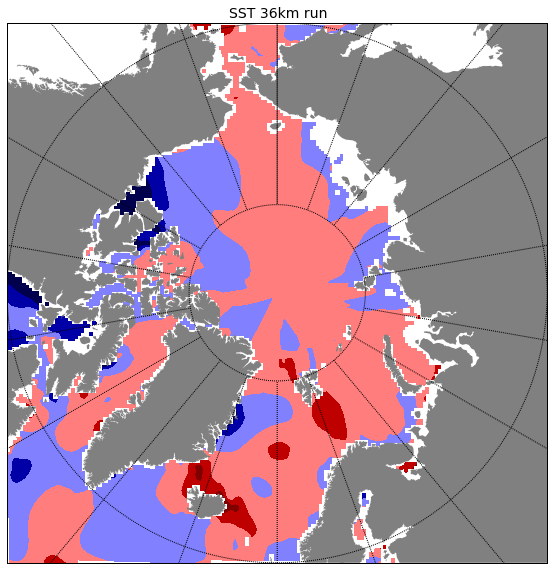

In [248]:
fig,ax = plt.subplots(1,1)
im = bp(run36.lon, run36.lat, phc.T[2,:,:] - woa.T[2,:,:], yescbar = False, vmin=-2,vmax=2,cmap=matplotlib.cm.seismic)
ax.set_title('SST '+run36.title)
ax.title.set_fontsize('14')
fig.subplots_adjust(right=1.7,top=2.)

In [19]:
run36v = StateRead()
run36v.readData('/scratch/general/am8e13/results36km_newspinup/',range(100))
run36v.fluxCalc()
run18v = StateRead()
run18v.readData('/scratch/general/am8e13/results18km_newspinup/',range(100))
run18v.fluxCalc()

In [20]:
liq10 = {'Fram' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Bering': {'Inflow' : 1.3, 'Outflow' : 0.0, 'Total flow' :1.3} ,
             'Davis': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6}
            }

In [261]:
core2 =  {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : -1.95} ,
             'Barents' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : 2.53} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' : 0.99} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :-1.75}
            }
obs =   {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7'} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3'} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'0.8+/-0.2'} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0'}
            }

In [256]:
sponge = StateRead()
sponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/',range(720,1020,1))
sponge.baroCalc()
nosponge = StateRead()
nosponge.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/',range(0,120,1))
nosponge.baroCalc()
sponge.fluxCalc()
nosponge.fluxCalc()

In [205]:
sponge.seaiceread(range(50))
nosponge.seaiceread(range(50))

In [262]:
for var in ['Barents','Bering','Fram','Davis']:
    print var
    print '18 km ',run18v.totalFluxes[var]
    print '36 km ',run36v.totalFluxes[var]
    print 'spong ',sponge.totalFluxes[var]
    print 'nospo ',nosponge.totalFluxes[var]
    print 'liq10 ',liq10[var]
    print 'Core2 ',core2[var]
    print 'obsv  ',obs[var]

Barents
18 km  {'Outflow': -0.89, 'Total flow': -0.13, 'Inflow': 0.76}
36 km  {'Outflow': -0.81, 'Total flow': -0.09, 'Inflow': 0.72}
spong  {'Outflow': -0.77, 'Total flow': -0.1, 'Inflow': 0.67}
nospo  {'Outflow': -0.7, 'Total flow': 0.0, 'Inflow': 0.71}
liq10  {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}
Bering
18 km  {'Outflow': -1.04, 'Total flow': -1.03, 'Inflow': 0.01}
36 km  {'Outflow': -1.09, 'Total flow': -1.07, 'Inflow': 0.02}
spong  {'Outflow': -1.1, 'Total flow': -1.08, 'Inflow': 0.02}
nospo  {'Outflow': -1.1, 'Total flow': -1.08, 'Inflow': 0.02}
liq10  {'Outflow': 0.0, 'Total flow': 1.3, 'Inflow': 1.3}
Core2  {'Outflow': [], 'Total flow': 0.99, 'Inflow': []}
obsv   {'Outflow': [], 'Total flow': '0.8+/-0.2', 'Inflow': []}
Fram
18 km  {'Outflow': -1.06, 'Total flow': 0.97, 'Inflow': 2.03}
36 km  {'Outflow': -1.17, 'Total flow': 0.8, 'Inflow': 1.97}
s

In [206]:
def interact(field,cmap1,vimin1,vimin2,vimax1,vimax2,time1,time2,z1,z2):
    def plot_field2(vimin=10,vimax=-10,time=0,Z=0):
        # This function plots a 2D field, the field is meant to have NaNs on the land place                                                
        # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar                          
        # cmap is a colomap                                                                                                               
        fig,axes = plt.subplots(1,1)
        if len(field.shape) == 3:
            masked_array = np.ma.array(field[time,:,:], mask=np.isnan(field[time,:,:]))
        elif len(field.shape) == 4:
            masked_array = np.ma.array(field[time,Z,:,:], mask=np.isnan(field[time,Z,:,:]))
        cmap= cmap1
        cmap.set_bad('grey',1.)
        ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca )
        fig.subplots_adjust(right=2.4,top=2)
        return plot_field2
        
    w = interactive(plot_field2,vimin=(vimin1,vimin2),vimax=(vimax1,vimax2),time=(time1,time2),Z=(z1,z2))
    display(w)

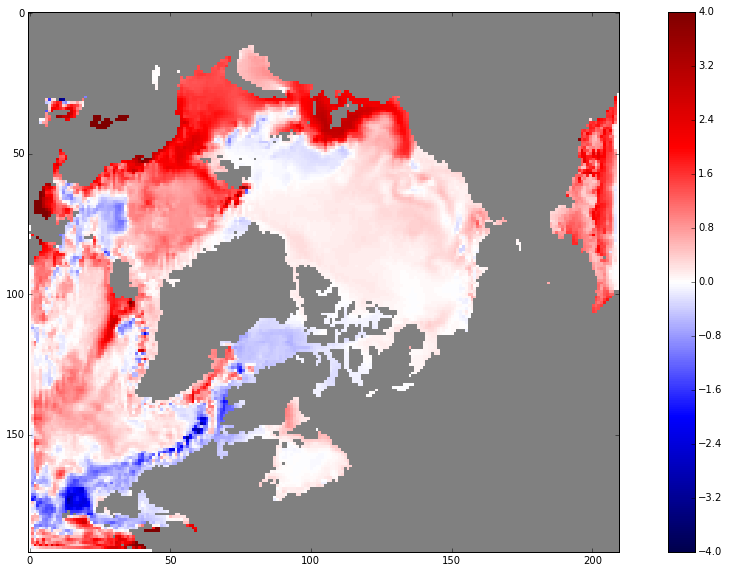

In [253]:
interact(nosponge.data['T'] - sponge.data['T'],matplotlib.cm.seismic,-40,40,-40,40,time1=0,time2=200,z1=0,z2=50)

In [34]:
run36 = StateRead()
run36.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/')
run36.readData(range(3))
run36.baroCalc()
#run36.getMeans(range(720,1080,1),['Temp','S'])
#run36.seaiceread(range(480,720,1))

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_sponge/results/


In [4]:
ice36 = np.mean(run36.seaice['SIarea'],axis=0)

In [5]:
nx = 210
ny = 192
nz = 50

f=netcdf.netcdf_file('/scratch/general/am8e13/results36km_newspinup/spinup36km.nc','w')
f.createDimension('X',nx)
f.createDimension('Y',ny)
f.createDimension('Z',nz)
T=f.createVariable('T','float',('Z','Y','X'))
T[:]=run36.mean['Temp']
S=f.createVariable('S','float',('Z','Y','X'))
S[:]=run36.mean['S']
lat=f.createVariable('lat','float',('Y','X'))
lat[:]=run36.lat
lon=f.createVariable('lon','float',('Y','X'))
lon[:]=run36.lon
depth=f.createVariable('depth','float',('Z'))
depth[:]=run36.depth
bathy=f.createVariable('bathy','float',('Z','Y','X'))
bathy[:]=run36.hfacc
ice = f.createVariable('ice','float',('Y','X'))
ice[:]=ice36
f.close()

In [27]:
file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results_newspinup/state.nc",'r')
Y_36km=file2read.variables['Y']
Y_36km=Y_36km[:]*1
Z_36km=file2read.variables['Z']
Z_36km=Z_36km[:]*1
X_36km=file2read.variables['X']
X_36km=X_36km[:]*1
I_36km=file2read.variables['iter']
I_36km=I_36km[:]*1
days_36km=file2read.variables['T']
days_36km=days_36km[:]*1

In [33]:
run36.psi

[]

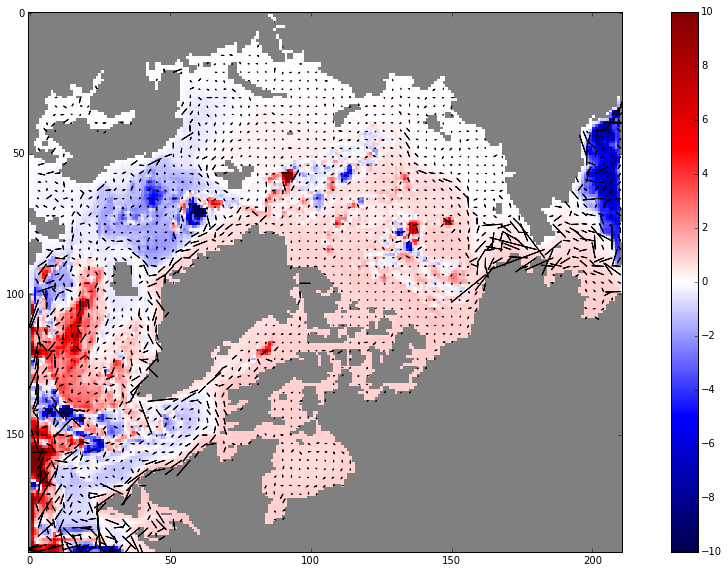

In [49]:
fig,axes = plt.subplots(1,1)
vimin = -10
vimax = 10
masked_array = np.ma.array(run36.psi[0,:,:], mask=np.isnan(run36.psi[0,:,:]))
cmap= matplotlib.cm.seismic
cmap.set_bad('grey',1.)
ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
#plt.contourf(X_36km,Y_36km,T_first[0,0,:,:])
for x in range(len(X_36km)-1,1,-3):
    for y in range(len(Y_36km)-1,1,-3):
        plt.arrow(X_36km[x],Y_36km[y],np.nanmean(np.nanmean(run36.data['U'][:,0:20,y,x],axis=1),axis=0)*75,np.nanmean(np.nanmean(run36.data['V'][:,0:20,y,x],axis=1),axis=0)*75)
cbar = fig.colorbar(ca )
fig.subplots_adjust(right=2.4,top=2)

In [23]:
map = Basemap(x = run36.lon , y = run36.lat , latlon = True)
map.drawcoastlines()

TypeError: __init__() got an unexpected keyword argument 'latlon'